# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [80]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

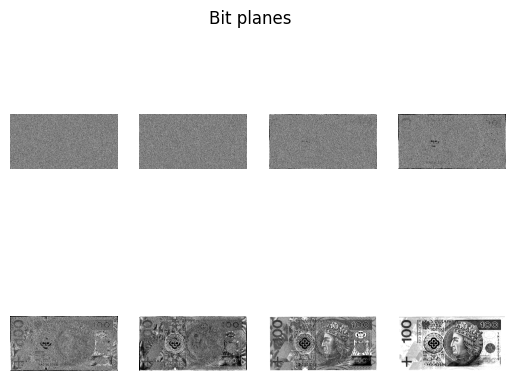

In [81]:
imgs = []
src = cv2.imread('100zloty.jpg', cv2.IMREAD_GRAYSCALE)


for i in range(8):
    bit_plane = (src & (1 << i)) / (1 << i)
    imgs.append(bit_plane.astype('bool').astype('uint8'))

fig, axs = plt.subplots(2, 4)
fig.suptitle('Bit planes')
for i in range(2):
    for j in range(4):
        axs[i, j].imshow(imgs[i*4+j], 'gray')
        axs[i, j].axis('off')



### Reconstruction

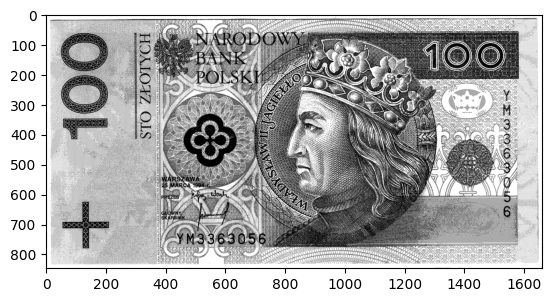

In [82]:
# using 2, 7 and 8 picture

img_reconstructed = (imgs[7] << 7) + (imgs[6] << 6) + (imgs[5] << 5) + (imgs[4] << 4) + (imgs[3] << 3) + (imgs[2] << 2) + imgs[1]
img_reconstructed = (imgs[3] << 3) + (imgs[2] << 2) + imgs[1]
img_reconstructed = (imgs[7] << 7) + (imgs[6] << 6)

plt.imshow(img_reconstructed, 'gray')